### Primer ejercicio [Pag 75]

Crearemos una función para extraer los datos desde una URL. Los datos pretenecen a los precios de las casas de California tomados en 1990.

## 1 DESCARGAR LA DATA

In [2]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT="https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH= os.path.join("datasets","housing")
HOUSING_URL= DOWNLOAD_ROOT + "datasets/housing/housing.tgz"


In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    
    """ función para descargar data de una URL, para luego extraerla a un directorio
    Args:
        housing_url: la URL del archivo a descargar
        housing_path: la ruta donde se descargar el archivo y posteriormente se extraera la información.
    
    return: Ninguno
    
    """
    
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)

    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path) 
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

Ejecutamos la función para descargar el archivo y crear las carpetas de destino

In [4]:
fetch_housing_data() 

Lectura de datos en un dataframe de pandas

In [5]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    """
    Creamos un función que devuelve un DataFrame de pandas con los datos de la dirección
    seleccionada.
    """

    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)



In [6]:
#Leemos la data en un dataframe
housing=load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing["ocean_proximity"].value_counts() #mostramos los valores posibles de la variable categorica "ocean_proximity"


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Grafica de histogramas

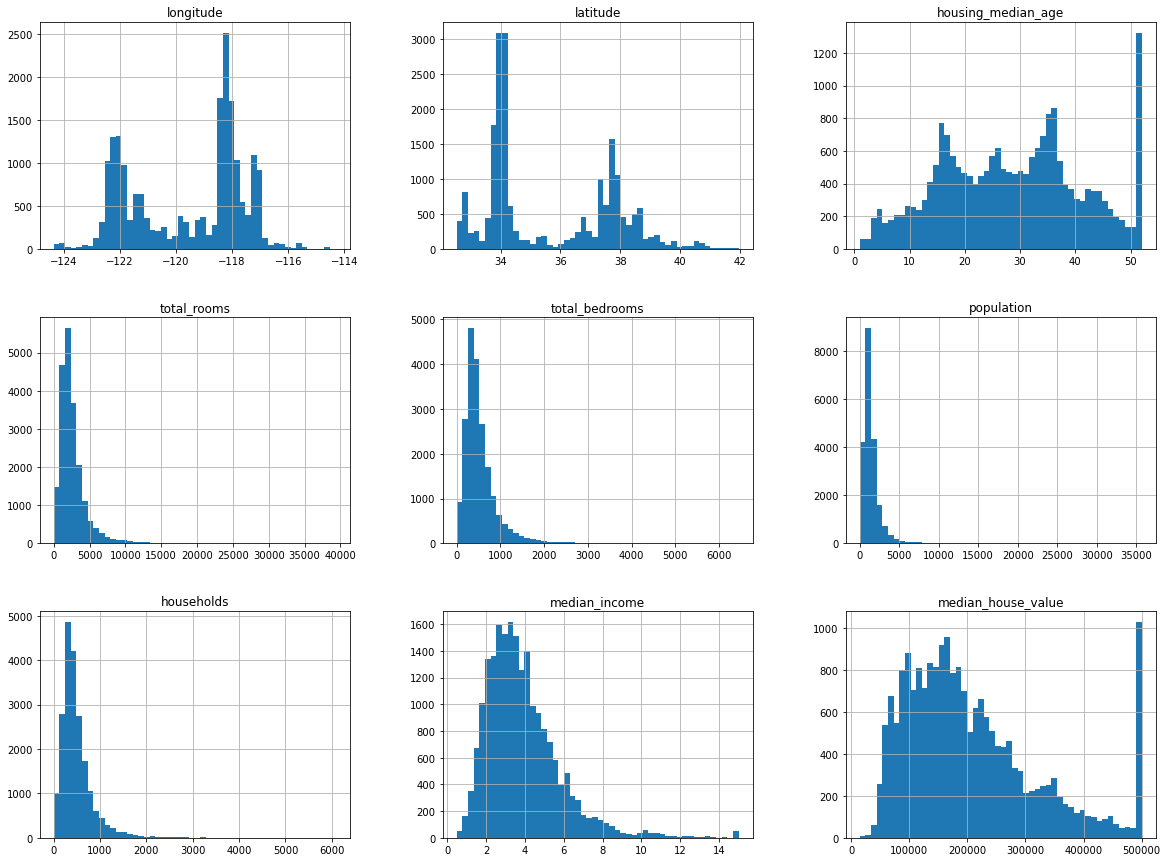

In [10]:
%matplotlib inline
# %matplotlib inline solo posible en un notebook de jupiter. Indica a Jupiter que configure matplotlib para que utilice
#el propio back-end de Jupiter.

import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

## 2 CREAR UN CONJUNTO DE PRUEBAS

#### 2.1 Primera forma (Muestreo aleatorio)

In [11]:
import numpy as np   

np.random.seed(42) #para que la salida de la permutación aleatoria sea idéntica en cada ejecución

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set, test_set =split_train_test(housing,0.2)
print('len train set:',len(train_set))
print('len test set:',len(test_set))

len train set: 16512
len test set: 4128


#### 2.2 Segunda forma (Muestreo aleatorio-con Robustes ante actualizaciones, mayor eficiencia)

La necesidad de actualizar los datos periodicamente hacen que los algoritmos esten preparados para hacerlos de manera eficiente. Considerando que los datos de prueba, antes elegidos, no deben hacer parte en los datos de entrenemaiento despues de cualquier actualización de datos, se opta por algun algoritmo que nos permita siempre tener como DATOS DE PRUEBAS el 20% (ratio de test) de datos de prueba "antiguos" + un 20% de datos de prueba de los datos agregados en la actualización.

La forma más eficiente para lograr lo anterior es utilizar el hash crc32, que explicados en terminos simples para nuestro uso, realiza una transformación de los datos de manera casi univoca, y cuyo resultado es una distribución aleatoria cerca de ser homogenea para datos con una gran cantidad de instancias.

A continuación crearemos una lista "Data" de 1000 instancias, y aplicaremos la transformación crc32 a cada instancia
para guardarla en otra lista de nombre "Data_crc32".

In [13]:
from zlib import crc32

Data=[]
Data_crc32=[]
for i in range(1000):
    Data.append(i)
    Data_crc32.append(crc32(np.int64(i))/5000000) 
    ''' dividimos la trasformada entre 5000000, 
    porque su mangitud es muy grande para nuestro apreciar nuestro ejemplo '''
    


Graficaremos los datos transformados para observar su aleatoriedad casi homogenea

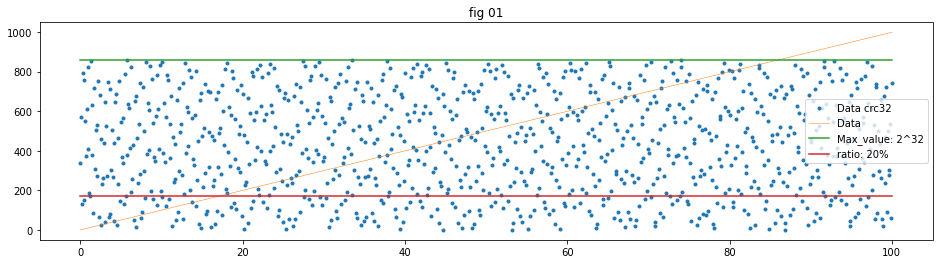

In [14]:
Max=[2**32/5000000]*1000
Value_ratio=[0.2*(2**32/5000000)]*1000


plt.figure(figsize=(16,4))
X = np.linspace(0, 100,1000)
plt.plot(X,Data_crc32,".")
plt.plot(X,Data,linewidth=0.5)
plt.plot(X,Max)
plt.plot(X,Value_ratio)
plt.legend(['Data crc32', 'Data','Max_value: 2^32', 'ratio: 20%'])
plt.title('fig 01');
plt.show()


Como se puede observar en la fig 01, la linea naranja genera mediante la transformación crc32 un mapa homogeneo de puntos azules. En esta distribución cuyo valor máximo es 2^32 (para nuestro ejemplo divido entre 5000000) puede ser separa facilmente
el conjunto de datos de prueva (Set_test) mediante una linea horizontal con el valor de: ratio*2^32 (para nuestro ejemplo divido entre 5000000).

Los datos debajo de la linea roja seran los datos de prueba los que unca seran utilizados como datos de entrenamiento.

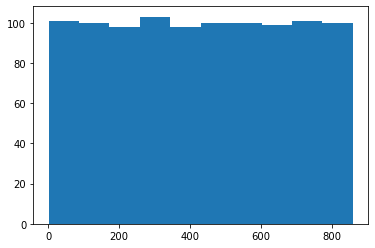

In [15]:
#El histograma a continuación muestra lo uniforme que es la distribución de los datos transformados
plt.hist(Data_crc32)
plt.show()

Para terminar, agregaremos más datos y observaremos como en la atualización de datos se respeta la integridad de los datos de
prueba anteriormente seleccionados.


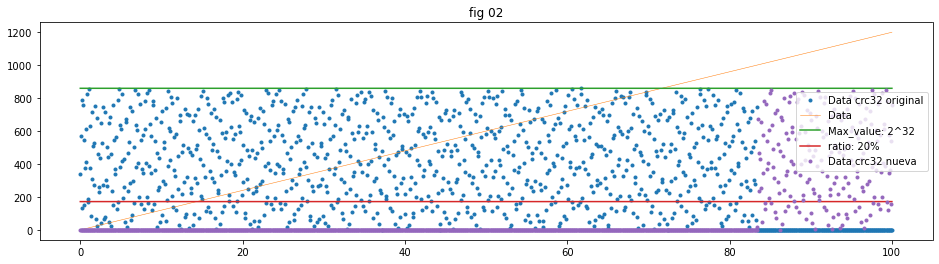

In [16]:
Data=[]
Data_crc32=[]
for i in range(1200):
    Data.append(i)
    Data_crc32.append(crc32(np.int64(i))/5000000) 

Data_crc32_1=Data_crc32[:1000]+[0]*200
Data_crc32_2=[0]*1000+Data_crc32[1000:1200]  

    
Max=[2**32/5000000]*1200
Value_ratio=[0.2*(2**32/5000000)]*1200


plt.figure(figsize=(16,4))
X = np.linspace(0, 100,1200)
plt.plot(X,Data_crc32_1,".")
plt.plot(X,Data,linewidth=0.5)
plt.plot(X,Max)
plt.plot(X,Value_ratio)
plt.plot(X,Data_crc32_2,".")
plt.legend(['Data crc32 original', 'Data','Max_value: 2^32', 'ratio: 20%','Data crc32 nueva'])
plt.title('fig 02');
plt.show()

Como se puede apreciar en la fig 02, la actualización que agrego nuevos datos (puntos morados), no altera la selección de los datos de prueba anteriores y considera un 20 por cientos de la nueva data como datos de prueba nuevos.

Creamos la funciones para definir  los datos de prueva con crc32

In [17]:

#Definimos la función test_set_check
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio*2**32


def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]


Añadimos la columna identificador:

2.1.1 Identificador enteros desde 0 hasta n

In [18]:
housing_with_id=housing.reset_index() #añade una columna index


In [19]:
housing_with_id

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [20]:
train_set, test_set=split_train_test_by_id(housing_with_id,0.2,"index")

In [21]:
train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


2.1.2 utilizando indicadores como función de latitud y longitud

In [22]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [23]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


### 2.3 Utilizando Scikit learn  (Muestreo aleatorio)

In [24]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [25]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


## 2.4 Muestreo Estratificado (2da mejor opción)

El muestreo estratificado nos permite tener una mayor posibilidad de obtener un conjunto de datos de prueba representativos del  conjunto de datos total a diferencia del muestreo aleatorio que depende de que su tamaño sea considerablemente grande respecto del número de caracteristicas de los datos para evitar un sesgo muestral. POr ejemplo, si tubieramos que hacer una encuesta a una población con un porcentaje de varones iagual 48.7% y mujeres 51.3 %, si decidimos extramer una muestra aleatoria, tendriamos alrededor de 12% de posibilidad de muestrar un conjunto de prueba sesgado que tendria o menos de 49 % de hombres o mas de 54% de mujeres. En cualquier caso, los resultados de la encuesta estarian totalmente distorisionados

observemos primero el histograma de ingresos medios

<AxesSubplot:>

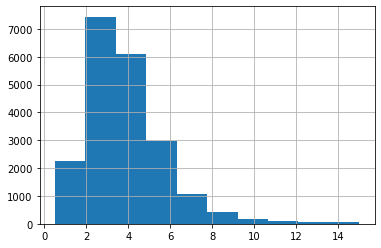

In [26]:
housing["median_income"].hist()

Categorización de median_income en 5 categorias

In [27]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

Categorizarlo en pocas categorias no permite aseguramos que cada categoria tenga suficiente cantidad de datos para extraer muestras representativas, de lo contrario la importnacia de una u otra categoria podria distorsionarse.


In [28]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

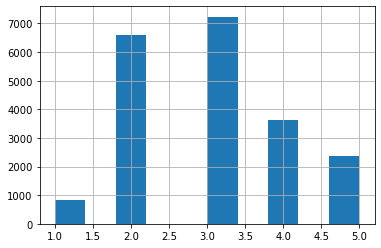

In [29]:
housing["income_cat"].hist()

In [30]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Evaluamos la proporción de de los datos categoricos

In [33]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [34]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

Mostramos un cuadro comprativo con los porcentajes de error entre el muestre estratificado y el aleatorio

In [40]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [41]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


Eliminamos el atributo income_cat para volver al estado original los datos

In [43]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

KeyError: "['income_cat'] not found in axis"

## 3 Descubra y visualice los datos para obtener conocimientos

In [55]:
%run functions.ipynb # llamamos al módulo creado en jupiter

In [56]:
housing = strat_train_set.copy()

Saving figure bad_visualization_plot


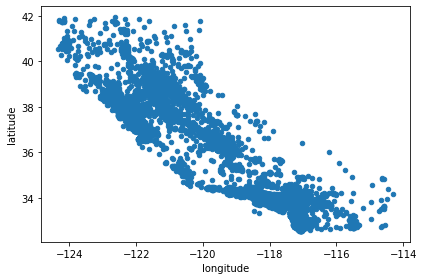

In [57]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


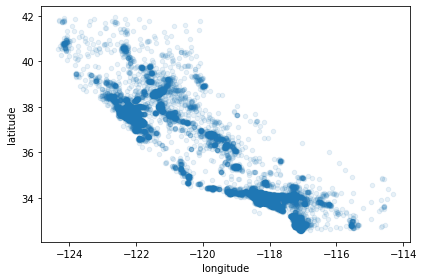

In [58]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

Saving figure housing_prices_scatterplot


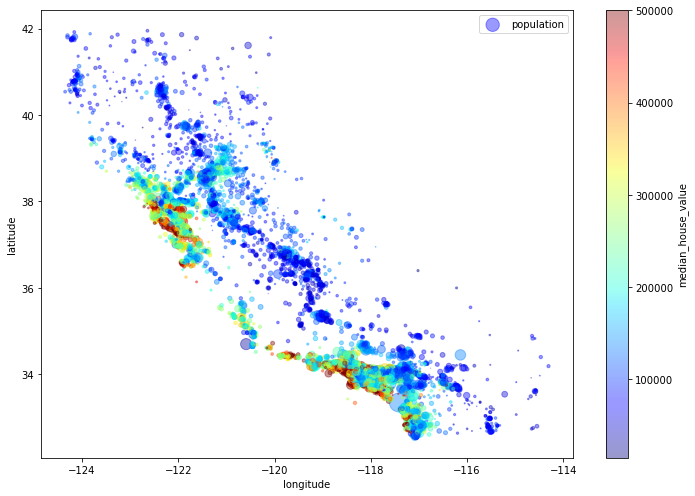

In [79]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

In [80]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x1cfc78c0f10>)

Saving figure california_housing_prices_plot


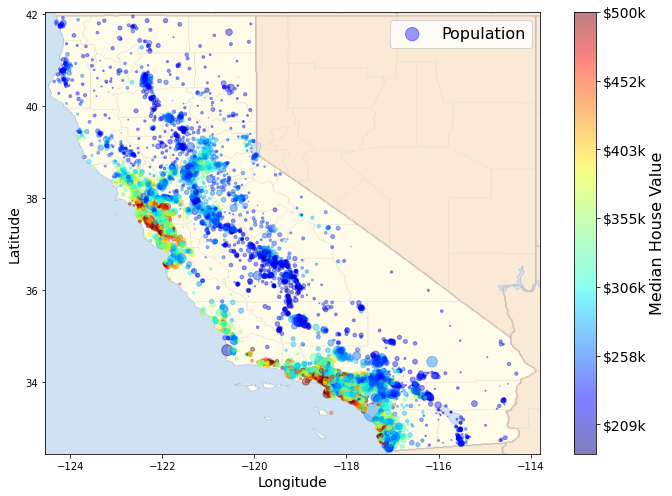

In [81]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

Buscando correlaciones